<a href="https://colab.research.google.com/github/alexandraeremia06/Kaggle/blob/main/2_Regression_Challenge_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

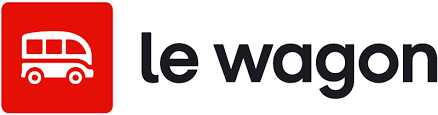

#The dataset 🏀

The dataset contains statistics of **4000** NBA players, including:

- `season`: The season (yearly) the player played in
- `poss`: Possessions played
- `mp`: Minutes played
- `do_ratio`: A player’s ratio of time spent in defense vs. offense; negative values mean more defense positioning
- `pacing`: Player impact on team possessions per 48 minutes
- `win_rating`: Wins Above Replacement rating, how many additional wins a player is worth over a same-level replacement

# Predicting Win Ratings in the NBA

You're finally ready to try out **your first ML model**! 🔥


Your first regression task of this week is to **predict** the Win Rating of NBA players based on their characteristics.


Why is this a regression task?



<details>
    <summary>Answer 💡</summary>
    
Because the Win rating is a continuous feature, as it's on a scale!
</details>


## Import the data




The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv).


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
You can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
</details>


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv")

In [6]:
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


Do you see the **features and target**?

Features: season, poss, mp, do_ration, pacing
Target: win_rating



## Simple modelling


### Define X and y


We first need to define our features (X) and our target (y).


Let's start off with a simple example - let `X` be **the number of minutes** a player has played.

You can figure out what `y` should be from the task we are trying to achieve!


In [8]:
X = df['mp']
y
# y will be "win_rating"

,win_rating
0,1.643091
1,10.808427
2,3.054773
3,0.230004
4,0.905614
...,...
3995,0.082828
3996,3.542416
3997,0.787185
3998,-0.312601


In [21]:
# we need to make sure X is a dataframe
X = df['mp']
type(X)   # panda.core.series.Series -----> we need to make it dataframe
X = pd.DataFrame(df['mp'])
X = df[['mp']]
type(X)
# now X is converted to dateframe ----> pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [14]:
X = df.drop(columns='win_rating')
X
#y should be a series
#X should be a dataframe! even if you choose only to have 1 feature

,season,poss,mp,do_ratio,pacing
0,1987,4847,2409,-1.546275,-0.599918
1,2017,5582,2708,0.996587,0.531888
2,2016,4976,2407,0.242598,0.127976
3,2021,1178,585,-1.343806,-1.201034
4,1988,4534,2056,-1.813990,-0.128997
...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698
3996,1994,3564,1785,0.907199,-0.125856
3997,1998,706,378,0.848178,0.694183
3998,2003,289,156,-6.298906,0.205844


### Train test split


Another critical step Machine Learning is the **train, test, split**. \
This is especially important to avoid [data leakage](https://datascientest.com/en/data-leakage-definition-and-prevention).

Use Sklearn `train_test_split`function to create **4 variables** `X_train`, `X_test`, `y_train`, `y_test`. \
Have a look at the lecture if you are unsure about the syntax.




- Use `random_state=0` to compare your final results with your buddy's results.




In [16]:
#firstly, we need to split the dataset into 2 parts so we can have the majority of the dataset, which we use to train the model and the remaining dataset which will be used for testing afterwards. the ratio is usually 75-25%,
# but it depends on the dataset lenght
# Use Sklearn train_test_splitfunction to create 4 variables X_train, X_test, y_train, y_test.

from sklearn.model_selection import train_test_split



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
# we want to see how the headers look like:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# X has 3000 rows and 5 columns
# y has 3000 respectively 1000 and no columns because it is a panda series repreenting a single column of data *a tuple with a single element - rows

((3000, 5), (1000, 5), (3000,), (1000,))

In [23]:
# To access a specific row (e.g., the 5th row) of the DataFrame:
X_train.iloc[4]
# Or if I want to access a row by its index label (if 4 is an index label):
# X_train.loc[4]

,2931
season,1988.000000
poss,6441.000000
mp,3168.000000
do_ratio,3.864060
pacing,-0.025779


In [24]:
X_train.head(3)

,season,poss,mp,do_ratio,pacing
678,2006,1731,919,-6.268387,0.503798
2427,2001,2717,1403,-0.628165,0.001414
3574,2008,5199,2760,1.475169,-0.308558


### Scaling the features



We need to scale our numerical feature.

Import and instantiate a scaler of your choice from the **Sklearn** library. Then :

1. Fit and transform `X_train` and load the results in a `X_train_scaled`variable
2. Transform `X_test` and load the results in a `X_test_scaled` variable


⚠️  **IMPORTANT!  NEVER** fit the test dataset.


In [30]:
# Fit and transform X_train and load the results in a X_train_scaledvariable
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
# Transform X_test and load the results in a X_test_scaled variable
X_test_scaled = scaler.transform(X_test)


### Modelling


Here come the exciting part!


**Linear Regression** is the fundamental regression model in Machine Learning!

For now, you don't need to understand the specifics of how it works, just know that it can do regression tasks very easily!

Import, instantiate and fit a **LinearRegression** model on the training data!

In [27]:
# we will be using LinearRegression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Scoring

Let's evaluate the performance of our model. \
Score your fitted model on your **test dataset** and store the result in a variable named `single_score`.



You should obtain a score around 54%.


In [29]:
single_score = model.score(X_test_scaled, y_test)
single_score

0.6321348519003519

How can we interpret the score?

For now, bigger is better (the scale goes up to 1). We'll understand more in depth how to make sense of this when we study Linear Regressions in detail.


## A more complete features set

It's time to try the **Linear Regression** on all of the relevant features.

Create new `X` and `y` variables, using `poss`,`mp`,`do_ratio`and `pacing`as features this time.


In [36]:
#Create new X and y variables, using poss,mp,do_ratioand pacingas features this time.
X = df[['poss', 'mp', 'do_ratio', 'pacing']]
y = df['win_rating']

### Train test split


Split `X` and `y` as you did before. \
Remember to set `random_state=0` to compare your results with your buddy's.


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Scaling

Now it's time to scale the data, just like we did before!

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### A new model

Because we have a new set of features, we need to train a new model!

Instantiate and train a second model on with your new features.


In [35]:
model_multi_features = LinearRegression()
model_multi_features.fit(X_train_scaled, y_train)

LinearRegression()

Score your new fitted model, and store the results in a variable named `multiple_score`.


In [39]:
multiple_score = model_multi_features.score(X_test_scaled, y_test)
multiple_score

0.6338089274793226

Compare `single_score`and `multiple_score`.

In [42]:
# firstly, we are printing the score of the first prediction model, where we used minutes playes (mp) as X to predict the player's win rating
# single_score: .4f shows the single score number showing only 4 decimals
# secondly, we repeat the action but this time for the second prediction model, where we used more info like possesion, min, deffense/offense ratio and pacing to predict it
# if multiple score > single score making the multiple one better? if yes, then it goes to the next like and prints :"The multiple features model performed better!"
# if single score was greater than multiple it will print similar but single feature model will perform better else both of them
# result : The multiple features model performed better! (0.6321 vs 0.6338)

print(f"Single feature model score: {single_score:.4f}")
print(f"Multiple features model score: {multiple_score:.4f}")
if multiple_score > single_score:
    print("The multiple features model performed better!")
elif multiple_score < single_score:
    print("The single feature model performed better!")
else:
    print("Both models performed equally.")

Single feature model score: 0.6321
Multiple features model score: 0.6338
The multiple features model performed better!


> **We can observe a substantial increase of the score when we train a model on many features instead of just one.**


## A new player arrives!

These are his stats:

- poss: 4902
- mp: 1845
- do_ratio: 1.011
- pacing: 0.381

Create a single row DataFrame for this new player!

In [44]:
new_player_stats = {
    'poss': 4902,
    'mp': 1845,
    'do_ratio': 1.011,
    'pacing': 0.381}
new_player_df = pd.DataFrame([new_player_stats])
new_player_df

,poss,mp,do_ratio,pacing
0,4902,1845,1.011,0.381


Predict the win rating for this new player!


In [47]:
# scale the new player's stats using the previously fitted scaler
new_player_scaled = scaler.transform(new_player_df)

# predict the win rating using the multi-feature model
predicted_win_rating = model_multi_features.predict(new_player_scaled)

print(f"Predicted Win Rating for the new player: {predicted_win_rating[0]:.2f}")

Predicted Win Rating for the new player: 3.47


## What is going on?

That's an astronomical win rating! Did'nt we forget to do something?

We did... can you figure out what we forgot to do and fix the issue? \
Once you have, you can go on with the prediction!

In [50]:
# the issue was forgetting to scale the new player's data. our model was trained on scaled features (mean=0, std=1).
# passing unscaled raw data to the model would lead to incorrect, often 'astronomical', predictions.
# how to fix it: we will apply the same `scaler` (StandardScaler in this case) that was fitted on `X_train`, to the `new_player_df` before making a prediction.
# This ensures the new data is transformed into the same scale as the training data.
# new_player_scaled = scaler.transform(new_player_df)
# predicted_win_rating = model_multi_features.predict(new_player_scaled)

**Congratulations on training your first regression model!** 🎉

